# Aula 14 interactividade com Python
<img  src='img/interatividade.png' width='600' height='300' />

As bibliotecas estudadas até o momento permitem trabalhar com grande quantidade de dados (Pandas), realizar operações matriciais e algebraicas de forma fácil e rápida (Numpy), e visualizar dados de forma personalizada e simples (Matplotlib). A interação dessas bibliotecas ajudam a realizar análises de grande quantidade de dados de forma rápida e com pouca codificação. Contudo, existem cenários onde é necessário realizar a exploração dos dados de forma interativa e assim obter mais informação; e com os conhecimentos adquiridos até o momento isso não se é possível.

Neste serie de conversas vamos ver como tornar nossos códigos e nossas análises mais interativas e obter mais informação das bases de dados. Vale a pena destacar que a interatividade em Python somente é possível ao se utiliza Jupyter-Lab ou Jupyter-notebook. As IDEs como VSCode, Spyder, Pycharme e outras não permitem realizar interatividade, contudo algumas IDES (como Spyder e Vscode) possuem extensões que permitem trabalhar com Notebook.

---

<font size="5"> Os tópicos que vamos abordar nesta série de conversas são:</font>

- Comandos mágicos em Jupyter-notebook
- Aspectos básicos de interatividade com ipwidgets
 - Importando a biblioteca
 - Método `interact`
 - Método `interactive`
 - Atualização continua desativada
- Explorando arquivos usando interactividade
- Analisando dados de um DataFrame Pandas
- Interatividade em gráficos
 - Matplotlib
 - Pyplot
 - Figuras 3D

## Comandos mágicos em Jupyter-notebook

Os comandos mágicos ou [Magic Commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) são aprimoramentos realizados à linguagem que fazem com que um código tenha mais funcionalidades (além das mostradas previamente). Existe mais de 100 comandos mágicos disponíveis, por esse motivo analisaremos os mais relevantes.

Os comandos mágicos podem ser utilizados de duas formas: a primeira utilizando o prefixo `%` e a segunda utilizando os prefixos `%%`. No primeiro caso o comando magico será aplicado unicamente na linha seguinte linha. No segundo caso o comando é ópera na célula inteira.

O comando `%lsmagic` lista todas os comandos mágicos disponíveis.

In [ ]:
%lsmagic

O comando `%ls` permite exibir o conteúdo do diretório atual. Possivelmente esse comando não esteja disponível para Windows.

In [ ]:
%ls

O comando `%run` permite executar um código externo ao notebook.

In [ ]:
%run Codigo_externo.py

O comando `%pycat` permite visualizar um código contigo em outro

In [ ]:
%pycat Codigo_externo_2.py

O comando `%pycat` permite importar um código contido em outro arquivo para o notebook atual.

In [ ]:
# %load Codigo_externo_2.py

O comando `%%write` permite escrever o conteudo de uma celula no arquivo de texto ou arquivo .py.

In [ ]:
%%writefile Codigo_externo_2_MOD.py
import numpy as np
import matplotlib.pyplot as plt
y = np.random.rand(1000)
x = np.arange(0, len(y))
plt.scatter(x=x,
            y=y,
            s=np.random.uniform(low=1, high=50, size=len(x)),
            c=np.random.uniform(low=1, high=10, size=len(x)),marker="*",
            alpha=0.8)
plt.title("Scarter plot")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")

Os comandos mágicos `%who`, `%who_ls`, `%whos` permitem:
- Visualizar as variáveis como uma lista;
- Visualizar as variáveis com informação reduzida;
- Visualizar as variáveis com informação detalhada.

In [ ]:
a = "25"
b = 25
c = (a, b)
d = [a, b, c]
e = "Fernan"
f = 5

In [ ]:
%who_ls

In [ ]:
%who

In [ ]:
%who str

In [ ]:
%who int

In [ ]:
%who list tuple

In [ ]:
%whos

In [ ]:
%whos str ndarray tuple int list

Como vimos previamente a geração de figuras diretamente no notebook não mostra uma eficiência muito alta em termos de interatividade devido a que não é possível explorar áreas específicas do gráfico. Para solucionar esse problema contamos com 2 comandos mágicos:

- `%matplolib`: esse comando permite a visualização dos gráficos numa janela externa a qual possui mais opções;

- `%matplolib notebook`: esse moando permite a visualização dos gráficos diretamente no notebook. As opções apresentadas neste modo de visualização são as mesmas das mostradas previamente.

Visualização sem nenhum comando magico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y = np.random.rand(1000)
x = np.arange(0, len(y))
plt.scatter(x=x,
            y=y,
            s=np.random.uniform(low=1,
                                high=50,
                                size=len(x)),
            c=np.random.uniform(low=1,
                                high=10,
                                size=len(x)),
            marker="*",
            alpha=0.8)
plt.title("Scarter plot", size=20)
plt.xlabel("Eixo X",size=20)
plt.ylabel("Eixo Y",size=20)

Visualização com `%matplotlib`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
y = np.random.rand(1000)
x = np.arange(0, len(y))
plt.scatter(x=x,
            y=y,
            s=np.random.uniform(low=1, high=50, size=len(x)),
            c=np.random.uniform(low=1, high=10, size=len(x)),marker="*",
            alpha=0.8)
plt.title("Scarter plot", size=20)
plt.xlabel("Eixo X",size=20)
plt.ylabel("Eixo Y",size=20)

Visualização com `%matplotlib notebook`.

<IPython.core.display.Javascript object>


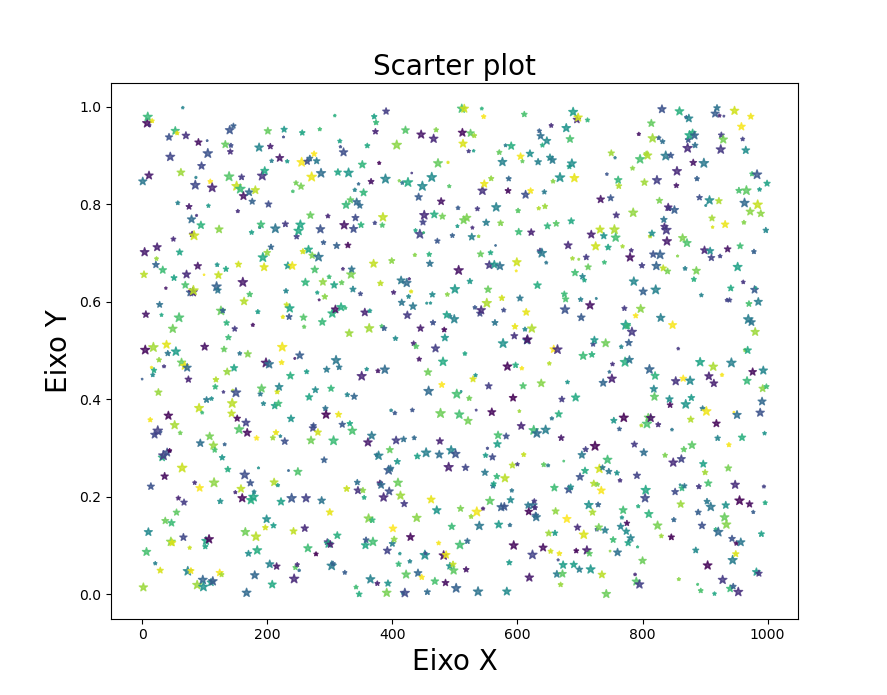

Text(0, 0.5, 'Eixo Y')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
y = np.random.rand(1000)
x = np.arange(0, len(y))
plt.scatter(x=x,
            y=y,
            s=np.random.uniform(low=1, high=50, size=len(x)),
            c=np.random.uniform(low=1, high=10, size=len(x)),marker="*",
            alpha=0.8)
plt.title("Scarter plot", size=20)
plt.xlabel("Eixo X",size=20)
plt.ylabel("Eixo Y",size=20)

---

## Aspectos básicos de interatividade com ipwidgets

Os conceitos mostrados previamente ajudam a ter uma interatividade maior entre o código e o sistema, contudo isso ainda não e suficiente para conseguir aproveitar 100% o potencial de jupyter-notebook.

A biblioteca [jupyter widgets](https://ipywidgets.readthedocs.io/en/stable/index.html) possibilita ao “infinito” a criação de objetos interativos como botoes de escolhas, listas, etc que facilita a análise de dados e figuras.

Na documentação desta biblioteca é apresentada todas as opções disponível e como utilizar cada uma. Devido ao grande número dessas opções somente serão apresentadas as mais relevantes. Recomendo fortemente revisar a [documentação](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) para uma maior compressão desta biblioteca.

### Instalando a biblioteca

Para realizar a instalação da biblioteca recomendo a leitura da [documentação](https://ipywidgets.readthedocs.io/en/stable/user_install.html) devido a que é necessário a instalação de outros pacotes para o correto funcionamento.
A instalação pode ser realizada por meio do pip ou conda:
- `pip install ipywidgets`
- `conda install -c conda-forge ipywidgets`


### Importando a biblioteca

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
def funcao_teste(x):
    print(x)

### método `interact`
O método `interact` facilita a passagem dos argumentos de uma forma dinâmica. Sem a necessidade de reescrever o código.

In [4]:
interact(funcao_teste, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.funcao_teste(x)>

In [5]:
interact(funcao_teste, x=5)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.funcao_teste(x)>

Podemos personalizar o slider definindo uma faixa de valores e um passo. Para fazer isso passamos `widgets.IntSlider(min, max, step, value)`.

In [6]:
interact(funcao_teste, x=widgets.IntSlider(min=0,
                                           max=100,
                                           step=2,
                                           velue=10))

interactive(children=(IntSlider(value=0, description='x', step=2), Output()), _dom_classes=('widget-interact',…

<function __main__.funcao_teste(x)>

In [7]:
def euler(x):
    return (1 + 1/x)**x

In [8]:
interact(euler, x=(1, 1000, 2))

interactive(children=(IntSlider(value=499, description='x', max=1000, min=1, step=2), Output()), _dom_classes=…

<function __main__.euler(x)>

Podemos utilizar também valores do tipo `float`.

In [9]:
interact(euler, x=(1.0, 10000, 0.5))

interactive(children=(FloatSlider(value=5000.5, description='x', max=10000.0, min=1.0, step=0.5), Output()), _…

<function __main__.euler(x)>

Também é possível passar argumentos to tipo texto. Neste caso será mostrada uma lista com as opções disponíveis.

In [10]:
options = "A1 A2 A3 A4 A5".split(" ")
interact(funcao_teste, x=options)

interactive(children=(Dropdown(description='x', options=('A1', 'A2', 'A3', 'A4', 'A5'), value='A1'), Output())…

<function __main__.funcao_teste(x)>

Caso se tenha uma função com mais de um parâmetro de entrada e queira-se deixar um parâmetro fixo, é possível fazer isso utilizando o método `fixes`

In [11]:
def power(x, y, n):
    return (x**y + y)/n

In [12]:
interact(power,
         x=(0, 10, 1),
         n=(1, 20, 2),
         y=fixed(2))

interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=9, description='n', max=20,…

<function __main__.power(x, y, n)>

### Método  `interactive`

Jupyter Widgets possui outro método que permite armazenar um Widgets para ser utilizado posteriormente. O método `interactive` retorna um objeto que não é mostrado automaticamente, para conseguir visualizar o Widged criado se deve utilizar o método Display.

In [13]:
from IPython.display import display
def power_print(x, y, n):
    return print((x**y + y)/n)

In [14]:
widget = interactive(power_print,
                     x=(0, 10, 1),
                     n=(1, 20, 2),
                     y=(2, 8, 0.5))

In [15]:
type(widget)

ipywidgets.widgets.interaction.interactive

In [16]:
widget.children

(IntSlider(value=5, description='x', max=10),
 FloatSlider(value=5.0, description='y', max=8.0, min=2.0, step=0.5),
 IntSlider(value=9, description='n', max=20, min=1, step=2),
 Output())

In [17]:
display(widget)

interactive(children=(IntSlider(value=5, description='x', max=10), FloatSlider(value=5.0, description='y', max…

In [19]:
widget.kwargs

{'x': 6, 'y': 4.5, 'n': 11}

Podemos modificar e controlar a saida do widgets utilizando o método `widgets.interactive_output`.

In [20]:
a_value = widgets.IntSlider()
b_value = widgets.IntSlider()
c_value = widgets.IntSlider()
ui = widgets.HBox([a_value, b_value, c_value])
def f_teste(a, b, c):
    print(f"O valor do parâmetro a é: {a}")
    print(f"O valor do parâmetro a é: {b}")
    print(f"O valor do parâmetro a é: {c}")
    print(f"A soma dos parâmetro a é: {a + b + c}")
    
out = widgets.interactive_output(f_teste, 
                                 {'a': a_value,
                                  'b': b_value,
                                  'c': c_value})

display(ui, out)

Output()

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
%matplotlib inline
X = np.linspace(-10, 10, num=1000)
def plot_interactive(m, b):
    plt.figure(2)
    plt.plot(X, m * X + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(plot_interactive,
                               m=(-2.0, 2.0),
                               b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Atualização continua desativada.
Como se observou no exemplo anterior, cada vez que se modifica o valor de um argumento por meio do slidebar o método `interactive` realiza a atualização de forma automática. Isso ocasiona que a função seja executada n vezes até atingir o valor desejado, gerando um desface entre o resultado da função e o valor atual do argumento. Quando a função é simples (como no exemplo anterior) isso não representa maiores problemas, contudo funciones mais robustas podem ocasionar problemas.


A biblioteca Jupyter Widgets possui 3 alternativas para contornar esses problemas:
- `interact_manual`: Essa opção cria um botão que executa a função nos valores escolhidos;
- `interactive`: Esse método permite a passagem de um dicionário com a chave manual e o valor True (`{'manual': True}`). O resultado é o mesmo do método `interact_manual`. Cabe destacar que esse argumento deve ser passado na segunda posição, logo depois do nome da função.;
- `continuous_update=False`: Esse parâmetro pode ser passado ao método `interact`, nesse caso a atualização da função só acontece quando se libera o cursor do mouse.

In [24]:
interactive?

In [30]:
np.random.randint()

TypeError: randint() takes at least 1 positional argument (0 given)

In [37]:
%matplotlib inline
m = 0.5
b = -1
def plot_interactive(num):
    plt.figure(2)
    X = np.arange(0, num)
    plt.plot(X,
             np.random.randint(0, 1000, num),
             color=np.random.rand(3,),
             marker="o",
             ls="")
    plt.show()

interactive_plot = interactive(plot_interactive, num=(0,100, 2))
interactive_plot

interactive(children=(IntSlider(value=50, description='num', step=2), Output()), _dom_classes=('widget-interac…

Aplicando `interact_manual`

In [39]:
interact_manual(plot_interactive,
                num=(0,1000, 2))

interactive(children=(IntSlider(value=500, description='num', max=1000, step=2), Button(description='Run Inter…

<function __main__.plot_interactive(num)>

Aplicando `interactive` e `{'manual': True}`

In [41]:
interactive_plot = interactive(plot_interactive,
                               {'manual': True},
                               num=(0,1000, 2))
interactive_plot

interactive(children=(IntSlider(value=500, description='num', max=1000, step=2), Button(description='Run Inter…

In [42]:
interact(plot_interactive,
         num=widgets.IntSlider(min=0,
                               max=1000,
                               step=2,
                               continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='num', max=1000, step=2), Output…

<function __main__.plot_interactive(num)>

## Explorando arquivos usando interactividade

Os recursos de interatividade permitem a explorar os diretórios e visualizar o conteúdo destes sem a necessidade de sair do Notebook.

In [43]:
!ls

Aula_14_Interactividade.ipynb  Codigo_externo_3.txt  kc_house_data.csv
Codigo_externo_2_MOD.py        Codigo_externo.py     medium_data_2019_01_26
Codigo_externo_2.py	       img		     programming_languages.csv


In [44]:
!tree

.
├── Aula_14_Interactividade.ipynb
├── Codigo_externo_2_MOD.py
├── Codigo_externo_2.py
├── Codigo_externo_3.txt
├── Codigo_externo.py
├── img
│   ├── bear
│   │   ├── bear01.jpg
│   │   ├── bear02.jpg
│   │   ├── bear03.jpg
│   │   ├── bear04.jpg
│   │   ├── bear05.jpg
│   │   ├── bear06.jpg
│   │   ├── bear07.jpg
│   │   ├── bear08.jpg
│   │   └── bear09.jpg
│   ├── cats
│   │   ├── cat_01.jpg
│   │   ├── cat_02.jpg
│   │   ├── cat_03.jpg
│   │   ├── cat_04.jpg
│   │   ├── cat_05.jpg
│   │   ├── cat_06.jpg
│   │   ├── cat_07.jpg
│   │   ├── cat_08.jpg
│   │   ├── cat_09.jpg
│   │   └── cat_10.jpg
│   ├── dogs
│   │   ├── dogs01.jpg
│   │   ├── dogs02.jpg
│   │   ├── dogs03.jpg
│   │   ├── dogs04.jpg
│   │   ├── dogs05.jpg
│   │   ├── dogs06.jpg
│   │   ├── dogs07.jpg
│   │   ├── dogs08.jpg
│   │   └── dogs09.jpg
│   └── interatividade.png
├── kc_house_data.csv
├── medium_data_2019_01_26
└── programming_languages.csv

4 directories, 37 files


In [45]:
!conda list -> text.txt

In [46]:
!tree

.
├── Aula_14_Interactividade.ipynb
├── Codigo_externo_2_MOD.py
├── Codigo_externo_2.py
├── Codigo_externo_3.txt
├── Codigo_externo.py
├── img
│   ├── bear
│   │   ├── bear01.jpg
│   │   ├── bear02.jpg
│   │   ├── bear03.jpg
│   │   ├── bear04.jpg
│   │   ├── bear05.jpg
│   │   ├── bear06.jpg
│   │   ├── bear07.jpg
│   │   ├── bear08.jpg
│   │   └── bear09.jpg
│   ├── cats
│   │   ├── cat_01.jpg
│   │   ├── cat_02.jpg
│   │   ├── cat_03.jpg
│   │   ├── cat_04.jpg
│   │   ├── cat_05.jpg
│   │   ├── cat_06.jpg
│   │   ├── cat_07.jpg
│   │   ├── cat_08.jpg
│   │   ├── cat_09.jpg
│   │   └── cat_10.jpg
│   ├── dogs
│   │   ├── dogs01.jpg
│   │   ├── dogs02.jpg
│   │   ├── dogs03.jpg
│   │   ├── dogs04.jpg
│   │   ├── dogs05.jpg
│   │   ├── dogs06.jpg
│   │   ├── dogs07.jpg
│   │   ├── dogs08.jpg
│   │   └── dogs09.jpg
│   └── interatividade.png
├── kc_house_data.csv
├── medium_data_2019_01_26
├── programming_languages.csv
└── text.txt

4 directories, 38 files


In [47]:
%pycat text.txt

In [48]:
import os
from IPython.display import Image, display

In [49]:
os.listdir("./img/cats")
@interact
def explorar_imd(file=os.listdir("./img/cats")):
    display(Image(f"./img/cats/{file}"))

interactive(children=(Dropdown(description='file', options=('cat_01.jpg', 'cat_07.jpg', 'cat_08.jpg', 'cat_10.…

Jupyter Widgets permite criar Widgets dependentes. Isto representa que o resultado de um widgets vai afetar o comportamento do próximo.

In [50]:
pastas = widgets.Dropdown(options="cats dogs bear".split(" "))
arquivos = widgets.Dropdown(options=os.listdir(f"./img/{pastas.value}"))

def atualizando_arquivos(*args):
    arquivos.options = os.listdir(f"./img/{pastas.value}")

def mostrar_image(pastas, arquivos):
    display(Image(f"./img/{pastas}/{arquivos}"))

pastas.observe(atualizando_arquivos, 'value')
interact(mostrar_image, pastas=pastas, arquivos=arquivos)

interactive(children=(Dropdown(description='pastas', options=('cats', 'dogs', 'bear'), value='cats'), Dropdown…

<function __main__.mostrar_image(pastas, arquivos)>

---

### Analisando dados de um DataFrame Pandas

Os recursos oferecidos por ipwidgest possibilita a análise manipulação de pandas DataFrame de uma melhor forma ao se criar funções dinâmicas. Nesta parte observaremos **algumas** formas de vincular `ipwidgets` com pandas DataFrame.

In [51]:
import pandas as pd
dados =  pd.read_csv("programming_languages.csv")
dados_2 = pd.read_parquet("medium_data_2019_01_26")

In [52]:
dados

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW-MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


In [53]:
@interact
def filtragem_ano(year=dados.iloc[:,0].unique()):
    display(dados.loc[dados["year"]==year])

interactive(children=(Dropdown(description='year', options=(1951, 1952, 1954, 1955, 1957, 1958, 1959, 1962, 19…

In [54]:
@interact
def filtragem_anos(year=dados.iloc[:,0].unique()):
    display(dados.loc[dados["year"]>=year])

interactive(children=(Dropdown(description='year', options=(1951, 1952, 1954, 1955, 1957, 1958, 1959, 1962, 19…

In [55]:
@interact
def filtragem_range_anos(ano_inicial=dados.iloc[:,0].unique(),
                         ano_final=dados.iloc[:,0].unique()):
    index_initial = dados[dados["year"]==ano_inicial].index[-1]
    index_final = dados[dados["year"]==ano_final].index[-1] + 1
    display(dados.iloc[index_initial:index_final, :])

interactive(children=(Dropdown(description='ano_inicial', options=(1951, 1952, 1954, 1955, 1957, 1958, 1959, 1…

In [56]:
def buscador(linguagem):
    display(dados.loc[dados["language"]==linguagem])
interact(buscador, linguagem='')

interactive(children=(Text(value='', description='linguagem'), Output()), _dom_classes=('widget-interact',))

<function __main__.buscador(linguagem)>

Interatividade para descrever uma tabela

In [57]:
dados_2.columns

Index(['claps', 'days_since_publication', 'fans', 'link', 'num_responses',
       'publication', 'published_date', 'read_ratio', 'read_time', 'reads',
       'started_date', 'tags', 'text', 'title', 'title_word_count', 'type',
       'views', 'word_count', 'claps_per_word', 'editing_days',
       '<tag>Education', '<tag>Data Science', '<tag>Towards Data Science',
       '<tag>Machine Learning', '<tag>Python'],
      dtype='object')

In [58]:
dados_2

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,...,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
129,2,597.301123,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,42.17,7,70,...,published,166,1859,0.001076,0,0,0,0,0,0
125,18,589.983168,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,30.34,14,54,...,published,178,3891,0.004626,0,0,0,0,0,0
132,51,577.363292,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,20.02,42,222,...,published,1109,12025,0.004241,0,0,0,0,1,1
126,0,576.520688,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,...,published,53,2533,0.000000,0,0,0,0,0,0
121,0,572.533035,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.47,14,5,...,published,59,3892,0.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,370,16.337142,50,https://towardsdatascience.com/the-reality-of-...,1,Towards Data Science,2019-01-12 13:33:00,25.00,11,343,...,published,1372,2795,0.132379,8,1,0,0,0,0
3,315,12.204314,44,https://towardsdatascience.com/the-myth-of-us-...,0,Towards Data Science,2019-01-16 16:44:00,26.47,10,266,...,published,1005,2532,0.124408,15,1,0,0,0,0
5,2000,8.215425,356,https://towardsdatascience.com/the-poisson-dis...,7,Towards Data Science,2019-01-20 16:28:00,26.35,14,2320,...,published,8806,3371,0.593296,0,1,1,1,0,0
1,53,3.547005,16,https://towardsdatascience.com/a-great-public-...,2,Towards Data Science,2019-01-25 08:30:00,17.17,13,96,...,published,559,3549,0.014934,1,1,0,0,0,0


In [59]:
def filtragem_2(claps,
                read_ratio,
                read_time,
                read,
                colum_1,
                colum_2,
                colum_3):
    claps_initial, claps_end = claps
    read_ratio_initial, read_ratio_end = read_ratio
    read_time_initial, read_time_end = read_time
    read_initial, read_end = read
    display(dados_2.loc[(dados_2["claps"] >= claps_initial) &\
                (dados_2["claps"] <= claps_end) &\
                (dados_2["read_ratio"] >= read_ratio_initial) &\
                (dados_2["read_ratio"] <= read_ratio_end) &\
                (dados_2["read_time"] >= read_time_initial) &\
                (dados_2["read_time"] <= read_time_end) &\
                (dados_2["read_time"] >= read_initial) &\
                (dados_2["read_time"] <= read_end),
                [colum_1, colum_2, colum_3]])

claps_widget = widgets.IntRangeSlider(min=dados_2["claps"].unique().min(),
                                      max=dados_2["claps"].unique().max(),
                                      step=1,
                                      description='Claps:',
                                      disabled=False,
                                      continuous_update=False,
                                      orientation='horizontal',
                                      readout=True,
                                      readout_format='d')
read_ratio_widget = widgets.IntRangeSlider(min=int(dados_2["read_ratio"].unique().min()),
                                      max=int(dados_2["read_ratio"].unique().max()),
                                      step=1,
                                      description='Read ratio:',
                                      disabled=False,
                                      continuous_update=False,
                                      orientation='horizontal',
                                      readout=True,
                                      readout_format='d')
read_time_widget = widgets.IntRangeSlider(min=int(dados_2["read_time"].unique().min()),
                                      max=int(dados_2["read_time"].unique().max()),
                                      step=1,
                                      description='Read Time:',
                                      disabled=False,
                                      continuous_update=False,
                                      orientation='horizontal',
                                      readout=True,
                                      readout_format='d')
read_widget = widgets.IntRangeSlider(min=dados_2["reads"].unique().min(),
                                     max=dados_2["reads"].unique().max(),
                                     step=1,
                                     description='Reads:',
                                     disabled=False,
                                     continuous_update=False,
                                     orientation='horizontal',
                                     readout=True,
                                     readout_format='d')
interact(filtragem_2,
         claps=claps_widget,
                read_ratio=read_ratio_widget,
                read_time=read_time_widget,
                read=read_widget,
                colum_1=dados_2.columns,
                colum_2=dados_2.columns,
                colum_3=dados_2.columns)


interactive(children=(IntRangeSlider(value=(3400, 10200), continuous_update=False, description='Claps:', max=1…

<function __main__.filtragem_2(claps, read_ratio, read_time, read, colum_1, colum_2, colum_3)>

In [60]:
@interact
def correlation_interactive(colum_1=dados_2.columns,
                            colum_2=dados_2.columns,
                            metho=["pearson", "kendall", "spearman"]):
    display(dados_2.loc[:, [colum_1, colum_2]].corr())

interactive(children=(Dropdown(description='colum_1', options=('claps', 'days_since_publication', 'fans', 'lin…

###  Interatividade em gráficos

Da mesma forma como foi possível vincular ipwidgest com Pandas DataFrame, é possível vincular ipwindgest com funções gráficas.Contudo, o uso de Matplotlib e ipwidges não tem uma performance alta, ocasionando que os gráficos não possam ser explorados a profundidade. Para resolver esse problema vamos analisar outra biblioteca para realizar gráficos em Python. Isso não significa que Matplotlib não é uma biblioteca boa, somente que é interessante conhecer outras alternativas além das mais usadas.

Neste sentido, a biblioteca [plotly](https://plotly.com/) se apresenta como uma excelente alternativa para conseguir explorar os dados de uma forma fluida com mais opções de visualização.

Gostaria de destacar que não vamos revisar o uso de esta biblioteca da mesma forma que fizemos com Matplotlib. Para as pessoas que estejam interessadas recomendo revisar a documentação. Outra coisa importante é que a biblioteca pode ser usada em R e Julia.


In [64]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly.subplots import make_subplots
from scipy.spatial import Delaunay

### Função seno

In [62]:
# @interact_manual
@interact(continuous_update=False)
def sin_plot(A=(0, 5, 0.1),
             k=(0, 5, 0.1),
             c=(0, 10),
             b=(0.1)):
    plt.style.use('ggplot')
    X = np.arange(0, 10, 0.01)
    plt.figure(figsize=(20,10))
    plt.plot(X, A*np.sin(k*X-b)+c)
    plt.xlim(-1, 10+1)
    plt.xlabel('X', size=20)
    plt.ylabel('Sin()', size=20)
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='A', max=5.0), FloatSlider(value=2.0, description='k'…

In [65]:
# @interact_manual
@interact(continuous_update=False)
def sin_plot(A=(0, 5, 0.1),
             k=(0, 5, 0.1),
             c=(0, 10),
             b=(0.1)):
    fig = go.Figure()
    X = np.arange(0, 10, 0.01)
    fig.add_trace(go.Scatter(x=X,
                             y=A*np.sin(k*X-b)+c,
                             mode='lines',
                             name="Seno"))
    fig.update_layout(showlegend=True,
                      xaxis_title='X',
                      yaxis_title='Sin',
                      height=500,
                      width=800,)
    fig.show()

interactive(children=(FloatSlider(value=2.0, description='A', max=5.0), FloatSlider(value=2.0, description='k'…

### Scarter Plot

In [66]:
@interact_manual
def scatter_plot(upper=(0, 100),
                 length=(0, 100),
                 alpha=(0.0, 1.0),
                 ls=['-', ':', '--', '-.'],
                 marker=["o", "v", "^", "8", "s", "H", "D"]):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,10))
    y = 3*np.random.randint(0,upper, length) + 5
    x = np.arange(0, len(y))
    plt.plot(x, 3*np.linspace(0, upper, length)+5, ls=ls, alpha=alpha)
    plt.scatter(x=x,
                y=y,
                s=np.linspace(100, 5000, len(x)),
                c=np.random.uniform(low=1, high=10, size=len(x)),
                marker=marker,
                alpha=alpha)
    plt.ylim(0, np.max(y)*1.2)
    plt.title("Scarter plot")
    plt.xlabel("Eixo X", size=20)
    plt.ylabel("Eixo Y", size=20)  

interactive(children=(IntSlider(value=50, description='upper'), IntSlider(value=50, description='length'), Flo…

In [67]:
@interact_manual
def scatter_plot(upper=(0, 100),
                 length=(0, 100),
                 alpha=(0.0, 1.0)):
    y = 3*np.random.randint(0,upper, length) + 5
    x = np.arange(0, len(y))
    fig = px.scatter(x=x,
                     y=y,
                     color=np.random.uniform(low=1, high=10, size=len(x)),
                     size=np.linspace(100, 5000, len(x)),
                    opacity=alpha)
    fig.show()


interactive(children=(IntSlider(value=50, description='upper'), IntSlider(value=50, description='length'), Flo…

### Modelo cinetico

In [68]:
@interact_manual
def kinetic_comparison(mu_max=(0.01, 3),
                       K_s=(0.01, 10),
                       K_I=(0.01, 20)):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,10))
    s = np.linspace(0, 100, 100)   
    mu = mu_max * s/(s+K_s)
    mu_I = mu_max * s/(s*(1+s/K_I)+K_s)
    plt.plot(s, mu)
    plt.plot(s, mu_I)
    plt.ylim(0, 3)
    plt.xlabel("Substrato", size=20)
    plt.ylabel("Velocidade especifica", size=20)


interactive(children=(FloatSlider(value=1.5050000000000001, description='mu_max', max=3.0, min=0.01), FloatSli…

In [69]:
@interact_manual
def kinetic_comparison(mu_max=(0.01, 3),
                       K_s=(0.01, 10),
                       K_I=(0.01, 20)):
    s = np.linspace(0, 100, 100)   
    mu, mu_I = mu_max * s/(s+K_s), mu_max * s/(s*(1+s/K_I)+K_s)
    fig = go.Figure()
    for y_values, label in zip((mu, mu_I),
                               ('Sem inibição', 'Com inibição')):
        fig.add_trace(go.Scatter(x=s,
                                 y=y_values,
                                 mode='lines',
                                 name=label))
    fig.update_layout(showlegend=True,
                      title_text="Comparação",
                      xaxis_title='Substrato',
                      yaxis_title='Velocidade especifica',
                      height=500,
                      width=800,)
    fig.show()


interactive(children=(FloatSlider(value=1.5050000000000001, description='mu_max', max=3.0, min=0.01), FloatSli…

### Heatmap

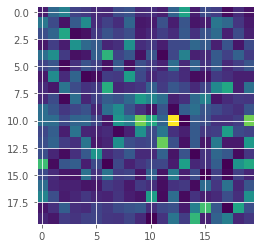

<Figure size 1440x1440 with 0 Axes>

In [70]:
fig, ax = plt.subplots()
plt.figure(figsize=(20,20))
im = ax.imshow(np.random.chisquare(5, (20,20)))

In [71]:
fig = px.imshow(np.random.chisquare(np.random.chisquare(5, (20,20))))
fig.show()

In [72]:
fig = px.imshow(np.random.chisquare(np.random.random((20,20))))
fig.show()

### 3D Plot

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
%matplotlib notebook
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
u = np.linspace(-6, 6, 30)
v = np.linspace(-6, 6, 30)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()
x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = f(x, y)
points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                        simplices=simplices,
                        title="Torus",
                        aspectratio=dict(x=1, y=1, z=1))
fig.show()


In [ ]:
fig = go.Figure()
fig.add_surface(z=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv"))
fig.update_layout(showlegend=False,
                  title_text="Exemplo 3D Plotly",
                  height=500,
                  width=800)
fig.show()

In [ ]:
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, 2*np.pi, 20)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.show()